In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score as rc, accuracy_score as acc

In [12]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('final_2/final_of_final.csv')

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_4088\1948740928.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('final_2/final_of_final.csv')


In [10]:
df.fillna(0,inplace=True)

In [16]:
df.set_index('경도_Lng-위도_Lat',inplace=True)

In [17]:
df.drop(['경도_Lng','위도_Lat'],axis=1,inplace=True)

In [19]:
encoder=LabelEncoder()

In [27]:
df.reset_index(inplace=True)

In [35]:
df['행정구역'].astype(str)

array(['제주특별자치도 제주시 한림읍', '제주특별자치도 제주시 애월읍', '제주특별자치도 제주시 구좌읍',
       '제주특별자치도 제주시 조천읍', '제주특별자치도 제주시 한경면', '제주특별자치도 제주시 추자면',
       '제주특별자치도 제주시 우도면', '제주특별자치도 제주시', '제주특별자치도 서귀포시 대정읍',
       '제주특별자치도 서귀포시 남원읍', '제주특별자치도 서귀포시 성산읍', '제주특별자치도 서귀포시 안덕면',
       '제주특별자치도 서귀포시 표선면', '제주특별자치도 서귀포시', '0'], dtype=object)

In [36]:
encoder.fit(df['행정구역'].astype(str))

LabelEncoder()

In [37]:
df['행정구역']=df['행정구역'].astype(str)

In [39]:
df['행정구역']=encoder.transform(df['행정구역'])

In [41]:
df['statNm']=df['statNm'].astype(str)

In [43]:
df['statNm']=encoder.fit_transform(df['statNm'])

In [45]:
encoder.fit(df['침수우려여부'])

LabelEncoder()

In [46]:
df.head(1)

,경도_Lng-위도_Lat,행정구역,statNm,침수우려여부,분류,합산 검색 수,내국인 관광객수,외국인 관광객수,지진 발생,cctv 유무,...,2022인구,2021경제활동인구,2022경제활동인구,2122인구증감율,2122경제활동인구증감율,2021전기차,2022전기차,2021전기차비율,2022전기차비율,2122전기차증감율
0,126.356_33.347,14,73,F,0,0.0,0.0,0.0,F,F,...,21063.0,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.1,26.82


In [49]:
from tqdm import tqdm
charger_lst=[]

for nm in tqdm(df['statNm']):
    if nm!=0:
        charger_lst.append('T')
    else:
        charger_lst.append('F')

df['충전기 유무']=charger_lst

100%|██████████| 97945/97945 [00:00<00:00, 846598.56it/s]


In [53]:
df['침수우려여부']=encoder.transform(df['침수우려여부'])
df['cctv 유무']=encoder.transform(df['cctv 유무'])
df['지진 발생']=encoder.transform(df['지진 발생'])
df['충전기 유무']=encoder.transform(df['충전기 유무'])

In [58]:
df['분류']=df['분류'].astype(str)

In [59]:
df['분류']=encoder.fit_transform(df['분류'])

In [61]:
scaler=MinMaxScaler()
scaler2=StandardScaler()

In [65]:
df.set_index('경도_Lng-위도_Lat',inplace=True)

In [78]:
index_1=list(df.columns[:4])+list(df.columns[7:9])

In [83]:
df

,행정구역,statNm,침수우려여부,분류,합산 검색 수,내국인 관광객수,외국인 관광객수,지진 발생,cctv 유무,2020교통량,...,2021경제활동인구,2022경제활동인구,2122인구증감율,2122경제활동인구증감율,2021전기차,2022전기차,2021전기차비율,2022전기차비율,2122전기차증감율,충전기 유무
경도_Lng-위도_Lat,,,,,,,,,,,,,,,,,,,,,
126.356_33.347,14,73,0,0,0.0,0.0,0.0,0,0,67346.0,...,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.10,26.82,1
126.257_33.352,14,554,0,0,0.0,0.0,0.0,0,0,67346.0,...,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.10,26.82,1
126.241_33.358,14,869,0,0,0.0,0.0,0.0,0,0,67346.0,...,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.10,26.82,1
126.274_33.358,14,305,0,0,0.0,0.0,0.0,0,0,67346.0,...,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.10,26.82,1
126.294_33.358,14,77,0,0,0.0,0.0,0.0,0,0,67346.0,...,12946.0,13583.0,-0.85,4.92,839.0,1064.0,6.42,8.10,26.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.404_33.481,9,0,0,0,0.0,0.0,0.0,0,1,169933.0,...,22057.0,23370.0,0.19,5.95,1430.0,1831.0,5.97,7.48,28.04,0
126.54_33.492,7,0,0,0,0.0,0.0,0.0,0,1,276496.0,...,222656.0,235734.0,0.01,5.87,14432.0,18463.0,3.02,3.63,27.93,0
126.62_33.385,11,0,0,0,0.0,0.0,0.0,0,1,67258.0,...,15218.0,16252.0,0.92,6.79,986.0,1273.0,6.45,8.17,29.11,0


In [93]:
df.columns[:-1]

Index(['행정구역', 'statNm', '침수우려여부', '분류', '합산 검색 수', '내국인 관광객수', '외국인 관광객수',
       '지진 발생', 'cctv 유무', '2020교통량', '2021교통량', '전년대비 증감대수', '전년대비 증감율(%)',
       '2021인구', '2022인구', '2021경제활동인구', '2022경제활동인구', '2122인구증감율',
       '2122경제활동인구증감율', '2021전기차', '2022전기차', '2021전기차비율', '2022전기차비율',
       '2122전기차증감율'],
      dtype='object')

In [94]:
feature=df[df.columns[:-1]]
label=df['충전기 유무']

In [108]:
# feature.columns[:4],feature.columns[7:9]
index_1

['행정구역', 'statNm', '침수우려여부', '분류', '지진 발생', 'cctv 유무']

In [110]:
index_2=(list(feature.columns[4:7])+list(feature.columns[9:]))
# index_2

In [111]:
feature_1=feature[index_1]

In [128]:
df_1=pd.DataFrame(scaler2.fit_transform(feature_1),index=df.index,columns=index_1)

In [112]:
feature_2=feature[index_2]

In [126]:
df_2=pd.DataFrame(scaler.fit_transform(feature_2),index=df.index,columns=index_2)

In [130]:
df_2

,합산 검색 수,내국인 관광객수,외국인 관광객수,2020교통량,2021교통량,전년대비 증감대수,전년대비 증감율(%),2021인구,2022인구,2021경제활동인구,2022경제활동인구,2122인구증감율,2122경제활동인구증감율,2021전기차,2022전기차,2021전기차비율,2022전기차비율,2122전기차증감율
경도_Lng-위도_Lat,,,,,,,,,,,,,,,,,,
126.356_33.347,0.0,0.0,0.0,0.243570,0.244711,0.276893,0.484701,0.055766,0.055287,0.058144,0.057620,0.280973,0.635659,0.058135,0.057629,0.785802,0.820669,0.890143
126.257_33.352,0.0,0.0,0.0,0.243570,0.244711,0.276893,0.484701,0.055766,0.055287,0.058144,0.057620,0.280973,0.635659,0.058135,0.057629,0.785802,0.820669,0.890143
126.241_33.358,0.0,0.0,0.0,0.243570,0.244711,0.276893,0.484701,0.055766,0.055287,0.058144,0.057620,0.280973,0.635659,0.058135,0.057629,0.785802,0.820669,0.890143
126.274_33.358,0.0,0.0,0.0,0.243570,0.244711,0.276893,0.484701,0.055766,0.055287,0.058144,0.057620,0.280973,0.635659,0.058135,0.057629,0.785802,0.820669,0.890143
126.294_33.358,0.0,0.0,0.0,0.243570,0.244711,0.276893,0.484701,0.055766,0.055287,0.058144,0.057620,0.280973,0.635659,0.058135,0.057629,0.785802,0.820669,0.890143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126.404_33.481,0.0,0.0,0.0,0.614595,0.601844,0.333662,0.409769,0.098646,0.098823,0.099063,0.099137,0.511062,0.768734,0.099085,0.099171,0.730722,0.757852,0.930634
126.54_33.492,0.0,0.0,0.0,1.000000,1.000000,0.763582,0.470721,1.000000,1.000000,1.000000,1.000000,0.471239,0.758398,1.000000,1.000000,0.369645,0.367781,0.926983
126.62_33.385,0.0,0.0,0.0,0.243251,0.246744,0.308776,0.512941,0.066920,0.067530,0.068348,0.068942,0.672566,0.877261,0.068320,0.068949,0.789474,0.827761,0.966147


In [134]:
df_2.reset_index(inplace=True)

In [135]:
df_1.reset_index(inplace=True)

In [137]:
df_3=pd.merge(df_1,df_2,how='left')

In [138]:
model=DecisionTreeClassifier()

In [141]:
df_3.drop('경도_Lng-위도_Lat',axis=1,inplace=True)

In [145]:
label=label.reset_index().drop('경도_Lng-위도_Lat',axis=1)

In [146]:
model.fit(df_3,label)

DecisionTreeClassifier()

In [148]:
pred=model.predict(df_3)

In [150]:
rc(label,pred)

1.0

In [161]:
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic' # 한글 폰트 세팅 (맑은 고딕)
matplotlib.rcParams['font.size']=12 # 폰트 크기 세팅
matplotlib.rcParams['axes.unicode_minus']=False # 유니코드가 - 기호로 설정되는 것을 방지

In [181]:
# df_3.columns[:9]
df_3_lst=list(df_3.columns[9:11])+list(df_3.columns[13:17])+list(df_3.columns[19:21])
df_3_lst2=list(df_3.columns[:8])+list(df_3.columns[11:13])+list(df_3.columns[17:19])+list(df_3.columns[21:])

In [185]:
df_3_new=df_3[df_3_lst2+df_3_lst]

In [190]:
df_3_new_1=df_3_new[['행정구역','statNm','분류']]

In [191]:
df_3_new.drop(['행정구역','statNm','분류'],axis=1,inplace=True)

C:\Users\ggyo0\AppData\Local\Temp\ipykernel_4088\4231096823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_new.drop(['행정구역','statNm','분류'],axis=1,inplace=True)


<AxesSubplot:>

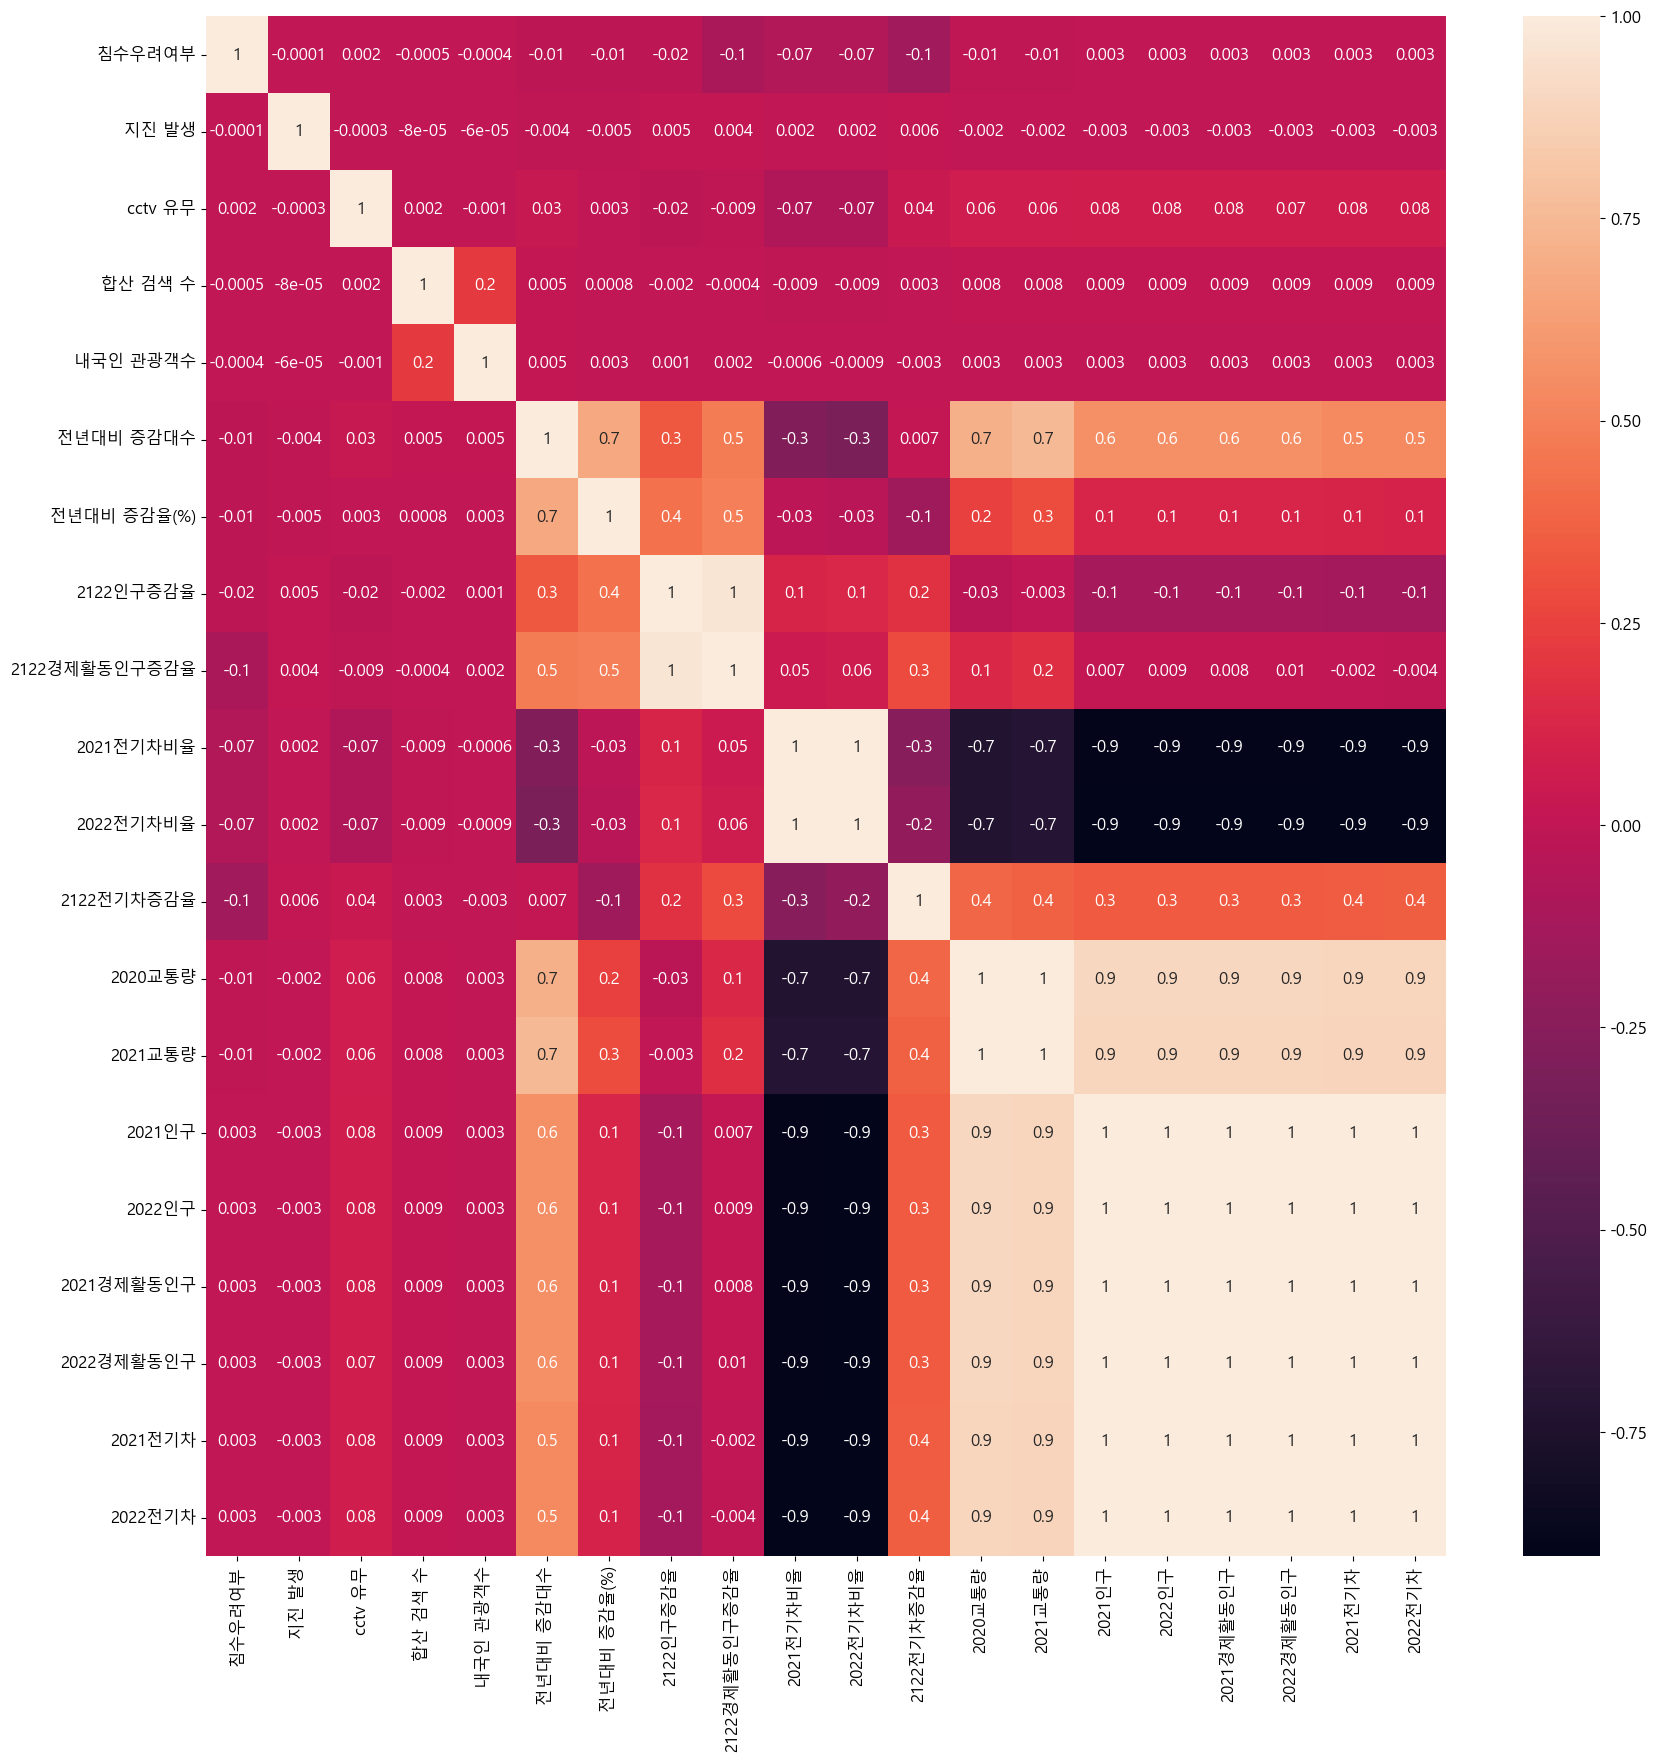

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df_3_new.corr(),annot=True, fmt='.1g')

In [220]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [199]:
import sklearn

sklearn.__version__

'1.1.3'

In [221]:
cols=list(df_3_new.columns[-8:])

print('대상 속성명:',cols)
pca.fit(df_3_new[cols])


대상 속성명: ['2020교통량', '2021교통량', '2021인구', '2022인구', '2021경제활동인구', '2022경제활동인구', '2021전기차', '2022전기차']


PCA(n_components=2)

In [222]:
print('PCA Component 별 변동성:',pca.explained_variance_ratio_)

PCA Component 별 변동성: [0.96371632 0.03601015]


In [208]:
df_3_new11=df_3_new[df_3_new.columns[:12]]

In [209]:
df_3_new12=df_3_new[df_3_new.columns[-8:]]

In [223]:
df_pca=pca.fit_transform(df_3_new12)

In [226]:
df_3_new_13=pd.DataFrame(df_pca,columns=['2개년 통계_1','2개년 통계_2'])

In [231]:
df_3_final=pd.concat([df_3_new11,df_3_new_13],axis=1)

In [233]:
display(df_3_final.head(1),label.head(1))

,침수우려여부,지진 발생,cctv 유무,합산 검색 수,내국인 관광객수,전년대비 증감대수,전년대비 증감율(%),2122인구증감율,2122경제활동인구증감율,2021전기차비율,2022전기차비율,2122전기차증감율,2개년 통계_1,2개년 통계_2
0,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425


,충전기 유무
0,1


In [258]:
df_3_final.to_csv('final_of_final_2.csv',index=False)

In [264]:
df_df=pd.concat([df_3_final,label],axis=1)

In [293]:
df_train_1=df_df[df_df['충전기 유무_']==1]

In [294]:
df_train_2=df_df[df_df['충전기 유무_']==0].sample(950)

In [295]:
df_train=pd.concat([df_train_1,df_train_2])

In [296]:
feature_tr=df_train[df_train.columns[:-1]]
label_tr=df_train['충전기 유무_']

In [287]:
df_df['경도_Lng-위도_Lat']=df_2['경도_Lng-위도_Lat']

In [289]:
df_df['충전기 유무_']=df_df['충전기 유무']

In [290]:
df_df.drop('충전기 유무',axis=1,inplace=True)

In [291]:
df_df

,침수우려여부,지진 발생,cctv 유무,합산 검색 수,내국인 관광객수,전년대비 증감대수,전년대비 증감율(%),2122인구증감율,2122경제활동인구증감율,2021전기차비율,2022전기차비율,2122전기차증감율,2개년 통계_1,2개년 통계_2,경도_Lng-위도_Lat,충전기 유무_
0,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.356_33.347,1
1,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.257_33.352,1
2,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.241_33.358,1
3,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.274_33.358,1
4,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.294_33.358,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97940,-0.031485,-0.004519,13.988449,0.0,0.0,0.333662,0.409769,0.511062,0.768734,0.730722,0.757852,0.930634,-0.302885,0.378726,126.404_33.481,0
97941,-0.031485,-0.004519,13.988449,0.0,0.0,0.763582,0.470721,0.471239,0.758398,0.369645,0.367781,0.926983,1.922094,-0.097575,126.54_33.492,0
97942,-0.031485,-0.004519,13.988449,0.0,0.0,0.308776,0.512941,0.672566,0.877261,0.789474,0.827761,0.966147,-0.597325,-0.048238,126.62_33.385,0
97943,-0.031485,-0.004519,13.988449,0.0,0.0,0.308776,0.512941,0.672566,0.877261,0.789474,0.827761,0.966147,-0.597325,-0.048238,126.618_33.387,0


In [303]:
feature_tr

,침수우려여부,지진 발생,cctv 유무,합산 검색 수,내국인 관광객수,전년대비 증감대수,전년대비 증감율(%),2122인구증감율,2122경제활동인구증감율,2021전기차비율,2022전기차비율,2122전기차증감율,2개년 통계_1,2개년 통계_2,경도_Lng-위도_Lat
0,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.356_33.347
1,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.257_33.352
2,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.241_33.358
3,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.274_33.358
4,-0.031485,-0.004519,-0.071488,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,126.294_33.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85982,-0.031485,-0.004519,-0.071488,0.0,0.0,1.000000,0.663085,0.688053,0.874677,0.772338,0.780142,0.814471,0.053368,0.188036,126.577_33.278
42356,-0.031485,-0.004519,-0.071488,0.0,0.0,0.763582,0.470721,0.471239,0.758398,0.369645,0.367781,0.926983,1.922094,-0.097575,126.581_33.470
68210,-0.031485,-0.004519,-0.071488,0.0,0.0,0.678499,0.776042,0.862832,0.941860,0.678091,0.683891,0.837371,-0.646752,0.051651,126.330_33.311
47534,-0.031485,-0.004519,-0.071488,0.0,0.0,0.763582,0.470721,0.471239,0.758398,0.369645,0.367781,0.926983,1.922094,-0.097575,126.546_33.505


----------------------------------------------------------------------------------

In [305]:
feature_tr_2=feature_tr.drop('경도_Lng-위도_Lat',axis=1)

In [306]:
label_tr

0        1
1        1
2        1
3        1
4        1
        ..
85982    0
42356    0
68210    0
47534    0
40981    0
Name: 충전기 유무_, Length: 1900, dtype: int32

In [309]:
from sklearn.ensemble import RandomForestClassifier as rfc

model=rfc(random_state=42)

params={
    'n_estimators':[50,100,200,300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [313]:
cv_rfc=GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='recall', refit=True)

In [314]:
cv_rfc.fit(feature_tr_2,label_tr)

c:\work\Miniconda\envs\tf_env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\work\Miniconda\envs\tf_env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\work\Miniconda\envs\tf_env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='recall')

In [317]:
print('best parameters:',cv_rfc.best_params_)
print('best score:',round(cv_rfc.best_score_,2))

best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}
best score: 0.53


In [318]:
pd.DataFrame(cv_rfc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197869,0.030085,0.019616,0.004638,gini,4,auto,50,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.515789,1.0,0.047368,0.521053,0.568421,0.530526,0.301858,58
1,0.314001,0.015896,0.028195,0.004272,gini,4,auto,100,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.515789,1.0,0.047368,0.521053,0.568421,0.530526,0.301858,58
2,0.588820,0.016114,0.044033,0.002729,gini,4,auto,200,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.515789,1.0,0.047368,0.521053,0.568421,0.530526,0.301858,58
3,0.929278,0.107476,0.081136,0.016823,gini,4,auto,300,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.515789,1.0,0.047368,0.521053,0.568421,0.530526,0.301858,58
4,1.412016,0.151017,0.102534,0.010518,gini,4,auto,500,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.515789,1.0,0.047368,0.521053,0.568421,0.530526,0.301858,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.117867,0.001638,0.013557,0.000482,entropy,8,log2,50,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.515789,1.0,0.052632,0.521053,0.568421,0.531579,0.300175,1
146,0.245803,0.019950,0.023139,0.002130,entropy,8,log2,100,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.515789,1.0,0.052632,0.521053,0.568421,0.531579,0.300175,1
147,0.467342,0.005304,0.040692,0.001307,entropy,8,log2,200,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.515789,1.0,0.052632,0.521053,0.568421,0.531579,0.300175,1
148,0.698540,0.009551,0.059636,0.001457,entropy,8,log2,300,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.515789,1.0,0.052632,0.521053,0.568421,0.531579,0.300175,1


In [319]:
estimator=cv_rfc.best_estimator_

In [324]:
df_df_3=df_df.reset_index().set_index(['index','경도_Lng-위도_Lat'])

In [326]:
x_final=df_df_3[df_df_3.columns[:-1]]
y_final=df_df_3['충전기 유무_']

In [328]:
pred=estimator.predict(x_final)

In [332]:
print('recall:',rc(y_final,pred))

recall: 0.8136842105263158


In [338]:
df_pred=pd.DataFrame(pred,index=x_final.index)

In [345]:
df_pred.rename(columns={0:'충전기 유무_'},inplace=True)

In [339]:
df_real=pd.DataFrame(y_final)

In [348]:
df_clustering=df_real[np.logical_and(df_real['충전기 유무_']==0,df_pred['충전기 유무_']==1)]

In [349]:
df_clustering

,,충전기 유무_
index,경도_Lng-위도_Lat,
3563,126.256_33.405,0
3864,126.265_33.416,0
4219,126.295_33.442,0
4267,126.294_33.444,0
22012,126.659_33.499,0
...,...,...
97939,126.263_33.411,0
97941,126.54_33.492,0
97942,126.62_33.385,0


In [356]:
df_clustering_2=df_clustering.reset_index().drop(['index','충전기 유무_'],axis=1)

In [363]:
df_clustering_final=pd.concat([df_clustering_2,pd.DataFrame(df_clustering_2['경도_Lng-위도_Lat'].str.split('_').tolist(),columns=['경도','위도'])],axis=1)

In [368]:
df_clustering_final.drop('경도_Lng-위도_Lat',axis=1,inplace=True)

In [369]:
df_clustering_final

,경도,위도
0,126.256,33.405
1,126.265,33.416
2,126.295,33.442
3,126.294,33.444
4,126.659,33.499
...,...,...
39967,126.263,33.411
39968,126.54,33.492
39969,126.62,33.385
39970,126.618,33.387


In [408]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=200, random_state=42)
cluster_labels=kmeans.fit_predict(df_clustering_final)

df_clustering_final['kmean_labels']=cluster_labels

In [394]:
jj=df_df_3.reset_index()[['경도_Lng-위도_Lat']]

In [401]:
jj=pd.DataFrame(jj['경도_Lng-위도_Lat'].str.split('_').to_list(),columns=['경도','위도'])

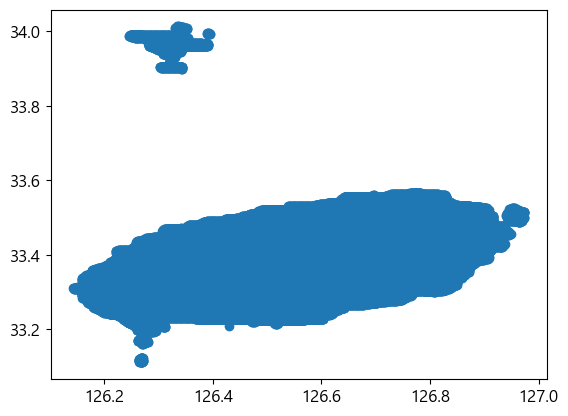

In [404]:
plt.scatter(jj['경도'].astype(float),jj['위도'].astype(float))

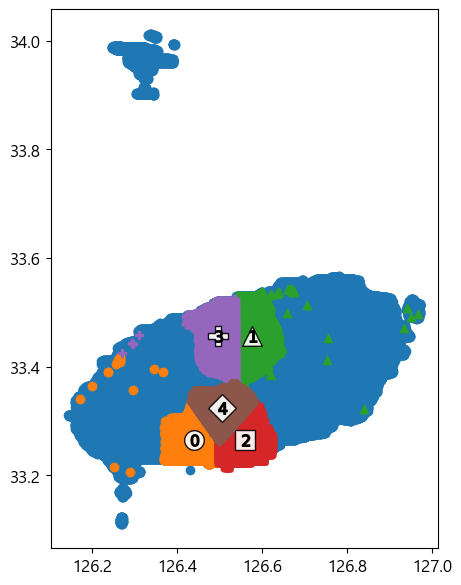

In [411]:
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)

markers=['o','^','s','P','D','H','x']

plt.figure(figsize=(5,7))
plt.scatter(jj['경도'].astype(float),jj['위도'].astype(float))
for label in unique_labels:
    label_cluster=df_clustering_final[df_clustering_final['kmean_labels']==label]
    center_x_y=centers[label]

    plt.scatter(x=label_cluster['경도'].astype(float),
                y=label_cluster['위도'].astype(float),
                marker=markers[label])

    plt.scatter(x=center_x_y[0],y=center_x_y[1], s=200, color='white', alpha=.9, edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [412]:
centers

array([[1.26439578e+02, 3.32658701e+01, 1.00000000e+00],
       [1.26576877e+02, 3.34574457e+01, 4.91828800e-14],
       [1.26558441e+02, 3.32644441e+01, 1.00000000e+00],
       [1.26496264e+02, 3.34560196e+01, 4.52970994e-14],
       [1.26505053e+02, 3.33248679e+01, 1.00000000e+00]])

In [413]:
df_clustering_final

,경도,위도,kmean_labels
0,126.256,33.405,0
1,126.265,33.416,0
2,126.295,33.442,3
3,126.294,33.444,3
4,126.659,33.499,1
...,...,...,...
39967,126.263,33.411,0
39968,126.54,33.492,1
39969,126.62,33.385,1
39970,126.618,33.387,1
